In [34]:
# Developer's setting
%load_ext autoreload
%autoreload 2

In [83]:
import matplotlib.pyplot as plt
# from skimage import data
# from skimage.color import rgb2gray
from skimage.morphology import disk
from skimage.filters.rank import gradient
import rasterio
from matplotlib import colors, cm
from matplotlib.colors import ListedColormap
import numpy as np
from rasterio.plot import show
from scipy import ndimage
import geopandas as gpd
import gftt
from scipy.stats import gaussian_kde

In [48]:
testfile_x = '/home/jovyan/Projects/PX_comparison/PX/CARST/20180304_20180405_LS8-061018_chip32_skip8_Gau/20180304-20180405_velo-raw_vx.tif'
testfile_y = '/home/jovyan/Projects/PX_comparison/PX/CARST/20180304_20180405_LS8-061018_chip32_skip8_Gau/20180304-20180405_velo-raw_vy.tif'
with rasterio.open(testfile_x) as srcx, rasterio.open(testfile_y) as srcy:
    datax = srcx.read(1)
    datay = srcy.read(1)

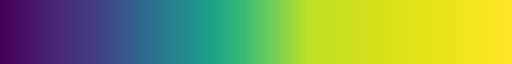

In [49]:
viridis = cm.get_cmap('viridis', 256)
newcolors1 = viridis(np.linspace(0, 0.2, 128))
newcolors2 = viridis(np.linspace(0.2, 0.9, 256))
newcolors3 = viridis(np.linspace(0.9, 1, 256))
newcolors = np.vstack((newcolors1, newcolors2, newcolors3))
cmap = ListedColormap(newcolors)
cmap.set_over(np.array([202,0,32,128]) / 255)
cmap.set_under(np.array([0,0,0,128]) / 255)
cmap

In [50]:
in_shp2 = '/home/jovyan/Projects/PX_comparison/Bedrock_shp/glacier_V1_Kaskawulsh_s.shp'
off_ice2 = gpd.read_file(in_shp2)

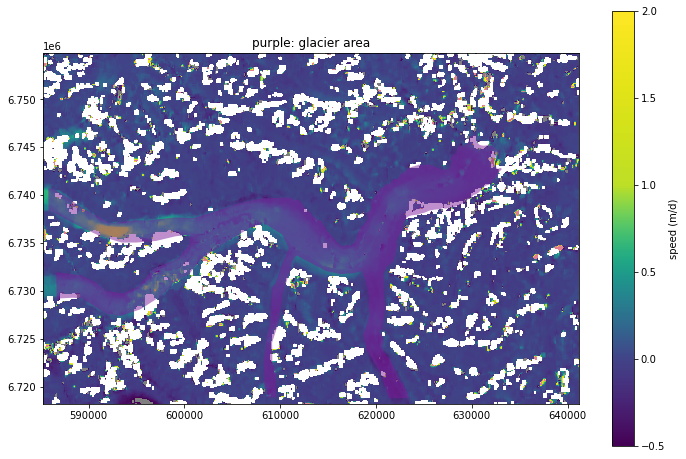

In [51]:
fig, ax0 = plt.subplots(1, 1, figsize=(12, 8))

with rasterio.open(testfile_x) as src:
    show(src, ax=ax0, vmin=-0.5, vmax=2, cmap=cmap)
    
cbar =  fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=-0.5, vmax=2), cmap=cmap), ax=ax0)
cbar.set_label('speed (m/d)')
off_ice2.plot(ax=ax0, alpha=0.5, facecolor='xkcd:purple')
ax0.set_title('purple: glacier area');

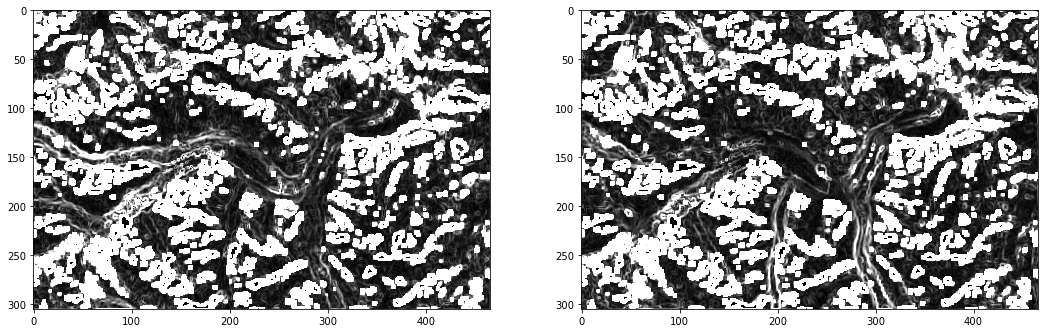

In [57]:
fig, ax1 = plt.subplots(1, 2, figsize=(18, 8))

sx = ndimage.sobel(datax,axis=0,mode='constant')
# Get y-gradient in "sy"
sy = ndimage.sobel(datax,axis=1,mode='constant')
# Get square root of sum of squares
sobelx = np.hypot(sx,sy)

sx = ndimage.sobel(datay,axis=0,mode='constant')
# Get y-gradient in "sy"
sy = ndimage.sobel(datay,axis=1,mode='constant')
# Get square root of sum of squares
sobely = np.hypot(sx,sy)

# Hopefully see some edges
ax1[0].imshow(sobelx, cmap=plt.cm.gray, vmin=0, vmax=1)
ax1[1].imshow(sobely, cmap=plt.cm.gray, vmin=0, vmax=1)
# plt.show()


In [58]:
glx = gftt.mask_by_shp(off_ice2['geometry'], sobelx, rasterio.open(testfile_x))
gly = gftt.mask_by_shp(off_ice2['geometry'], sobely, rasterio.open(testfile_y))

(0.0, 40.0)

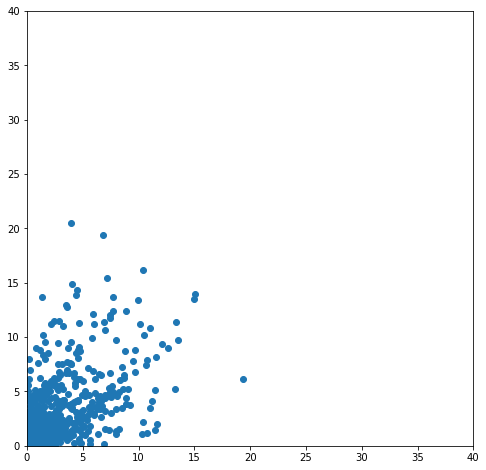

In [74]:
fig, ax2 = plt.subplots(1, 1, figsize=(8, 8))

ax2.scatter(glx, gly)
ax2.set_xlim((0, 40))
ax2.set_ylim((0, 40))

In [66]:
testfile2_x = '/home/jovyan/Projects/PX_comparison/PX/GIV/u_l12_NAOF_50.tif'
testfile2_y = '/home/jovyan/Projects/PX_comparison/PX/GIV/v_l12_NAOF_50.tif'
with rasterio.open(testfile2_x) as srcx, rasterio.open(testfile2_y) as srcy:
    data2x = srcx.read(1)
    data2y = srcy.read(1)

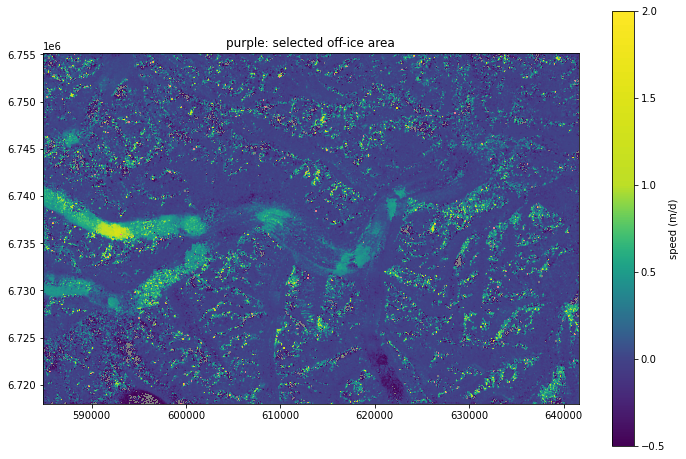

In [68]:
fig, ax3 = plt.subplots(1, 1, figsize=(12, 8))

with rasterio.open(testfile2_x) as src:
    show(src, ax=ax3, vmin=-0.5, vmax=2, cmap=cmap)

cbar =  fig.colorbar(cm.ScalarMappable(norm=colors.Normalize(vmin=-0.5, vmax=2), cmap=cmap), ax=ax3)
cbar.set_label('speed (m/d)')
ax3.set_title('purple: selected off-ice area');

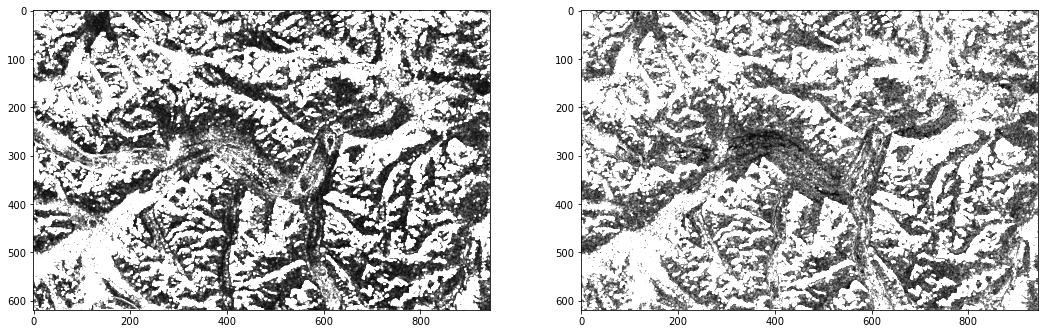

In [69]:
fig, ax4 = plt.subplots(1, 2, figsize=(18, 8))

sx = ndimage.sobel(data2x,axis=0,mode='constant')
# Get y-gradient in "sy"
sy = ndimage.sobel(data2x,axis=1,mode='constant')
# Get square root of sum of squares
sobel2x = np.hypot(sx,sy)

sx = ndimage.sobel(data2y,axis=0,mode='constant')
# Get y-gradient in "sy"
sy = ndimage.sobel(data2y,axis=1,mode='constant')
# Get square root of sum of squares
sobel2y = np.hypot(sx,sy)

# Hopefully see some edges
ax4[0].imshow(sobel2x, cmap=plt.cm.gray, vmin=0, vmax=1)
ax4[1].imshow(sobel2y, cmap=plt.cm.gray, vmin=0, vmax=1)
# plt.show()


In [70]:
gl2x = gftt.mask_by_shp(off_ice2['geometry'], sobel2x, rasterio.open(testfile2_x))
gl2y = gftt.mask_by_shp(off_ice2['geometry'], sobel2y, rasterio.open(testfile2_y))

(0.0, 100.0)

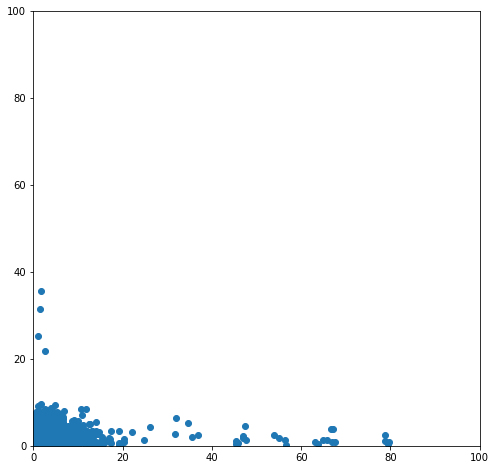

In [76]:
fig, ax5 = plt.subplots(1, 1, figsize=(8, 8))

ax5.scatter(gl2x, gl2y)
ax5.set_xlim((0, 100))
ax5.set_ylim((0, 100))

In [87]:
glxs = glx[np.logical_and(glx < 30, gly < 30)]
glys = gly[np.logical_and(glx < 30, gly < 30)]
gl2xs = gl2x[np.logical_and(gl2x < 100, gl2y < 100)]
gl2ys = gl2y[np.logical_and(gl2x < 100, gl2y < 100)]

In [88]:
gl2xs.flatten().shape

(583851,)

In [91]:
def kde(x, y, thres_sigma=3.0, max_n=10000):
    xy = np.vstack([x, y])
    if len(x) > max_n:
        x_full = x[:]
        y_full = y[:]
        ## See https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice
        rng = np.random.default_rng()
        xy = rng.choice(xy, size=max_n, replace=False, axis=1)
        x = xy[0, :]
        y = xy[1, :]
    z = gaussian_kde(xy)(xy)

    thres_multiplier = np.e ** (thres_sigma ** 2 / 2)   # normal dist., +- sigma number 
    thres = max(z) / thres_multiplier
    thres_idx = z >= thres
    idx = thres_idx    # alias
    return x_full, y_full, x, y, z, thres_idx

In [92]:
xf1, yf1, x1, y1, z1, t1 = kde(glxs, glys)
xf2, yf2, x2, y2, z2, t2 = kde(gl2xs, gl2ys)

(0.0, 3.0)

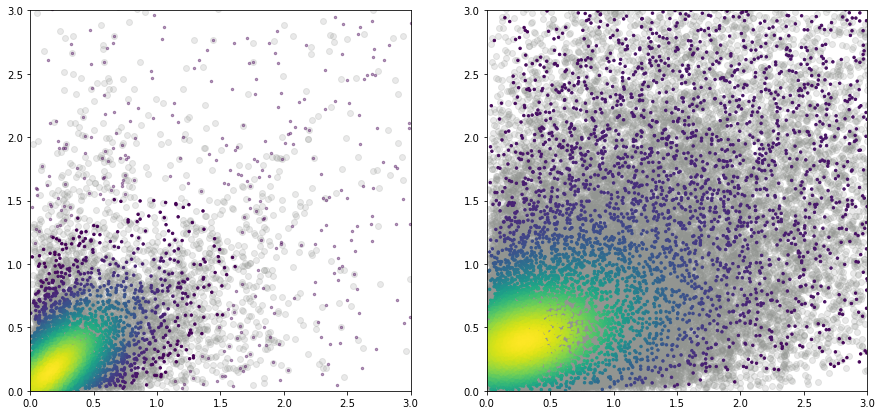

In [94]:
fig, ax6 = plt.subplots(1, 2, figsize=(15, 7))

ax6[0].scatter(xf1, yf1, color='xkcd:gray', alpha=0.2)
ax6[1].scatter(xf2, yf2, color='xkcd:gray', alpha=0.2)

gftt.plot_off_ice_errors(x1, y1, z1, t1, ax=ax6[0])
gftt.plot_off_ice_errors(x2, y2, z2, t2, ax=ax6[1])

limrange = (0, 3)
ax6[0].set_xlim(limrange)
ax6[0].set_ylim(limrange)
ax6[1].set_xlim(limrange)
ax6[1].set_ylim(limrange)